**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**


# Time Series Analysis: Basic Implementations

This repository contains basic implementations of key time series models, including **Autoregressive (AR)**, **Moving Average (MA)**, **ARMA**, **ARIMA**, **SARIMA**, and **Exponential Smoothing**. These models are fundamental for understanding and forecasting time series data. The goal of this project is to provide a hands-on introduction to time series analysis, with a focus on practical implementation and interpretation.



## **Models Covered**

### **1. Autoregressive (AR) Model**
- **Description**: The AR model predicts the current value of a time series based on its past values. It assumes that the current value is linearly dependent on its previous values.
- **Equation**:
  $$
  y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t
  $$
  - $y_t$: Current value.
  - $y_{t-1}, y_{t-2}, \dots, y_{t-p}$: Past values.
  - $\phi_1, \phi_2, \dots, \phi_p$: Coefficients.
  - $\epsilon_t$: Error term.
- **Use Case**: Captures dependencies between current and past values.
- **Implementation**: Fitted using `statsmodels.tsa.ar_model.AutoReg`.

### **2. Moving Average (MA) Model**
- **Description**: The MA model predicts the current value of a time series based on past forecast errors (residuals). It assumes that the current value is linearly dependent on past errors.
- **Equation**:
  $$
  y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
  $$
  - $y_t$: Current value.
  - $\epsilon_t, \epsilon_{t-1}, \dots, \epsilon_{t-q}$: Past errors.
  - $\theta_1, \theta_2, \dots, \theta_q$: Coefficients.
- **Use Case**: Captures the impact of past shocks or errors.
- **Implementation**: Fitted using `statsmodels.tsa.arima.model.ARIMA` with $p=0$.

### **3. ARMA Model**
- **Description**: The ARMA model combines the AR and MA models to capture both past values and past errors. It is suitable for stationary time series with no trend or seasonality.
- **Equation**:
  $$
  y_t = c + \phi_1 y_{t-1} + \dots + \phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
  $$
- **Use Case**: Suitable for stationary time series with no trend or seasonality.
- **Implementation**: Fitted using `statsmodels.tsa.arima.model.ARIMA` with $d=0$.

(not included in the notebook)

### **4. ARIMA Model**
- **Description**: The ARIMA model extends ARMA by adding differencing to handle non-stationary data. It is widely used for time series with trends.
- **Equation**:
  $$
  y_t' = c + \phi_1 y_{t-1}' + \dots + \phi_p y_{t-p}' + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}
  $$
  where $y_t'$ is the differenced series.
- **Use Case**: Handles time series with trends.
- **Implementation**: Fitted using `statsmodels.tsa.arima.model.ARIMA`.

### **5. SARIMA Model**
- **Description**: The SARIMA model extends ARIMA to handle seasonality by adding seasonal AR, MA, and differencing terms. It is suitable for time series with both trend and seasonality.
- **Use Case**: Suitable for time series with both trend and seasonality.
- **Implementation**: Fitted using `statsmodels.tsa.statespace.sarimax.SARIMAX`.

### **6. Exponential Smoothing**
- **Description**: Exponential smoothing is a forecasting method that assigns exponentially decreasing weights to past observations. It is simple and effective for short-term forecasting.
- **Types**:
  - **Simple Exponential Smoothing (SES)**: For data with no trend or seasonality.
  - **Holt’s Linear Trend Model**: For data with a trend.
  - **Holt-Winters Seasonal Model**: For data with trend and seasonality.
- **Use Case**: Simple and effective for short-term forecasting.
- **Implementation**: Fitted using `statsmodels.tsa.holtwinters.ExponentialSmoothing`.


## **Implementation Details**

### **Code Structure**
- Each model is implemented in a separate Python script or notebook.
- Synthetic time series data.
- Key steps include:
  1. **Data Generation**: Create synthetic time series data with trends, seasonality, and noise.
  2. **Data Visualization**: Plot the data to understand its structure.
  3. **Model Fitting**: Fit the model to the training data.
  4. **Forecasting**: Use the model to predict future values or test data.
  5. **Evaluation**: Calculate metrics like MAE, RMSE.
  
  ## **Next Steps**

### **1. Hyperparameter Tuning**
- Use techniques like **grid search** or **Bayesian optimization** to find the best parameters (e.g., $p$, $d$, $q$ for ARIMA).
- Example: Use `pmdarima` for automated ARIMA parameter tuning.

### **2. Advanced Models**
- Explore advanced models like:
  - **LSTM (Long Short-Term Memory)**: A type of recurrent neural network for complex time series.
  - **Prophet**: A forecasting tool developed by Facebook for time series with seasonality and holidays.
  - **VAR (Vector Autoregression)**: For multivariate time series.

### **3. Domain Knowledge**
- Incorporate domain-specific insights to improve model performance.
- Example: Use external variables (e.g., weather data for sales forecasting).

### **4. Evaluation and Validation**
- Use **cross-validation** and **backtesting** to ensure model robustness.
- Evaluate models using metrics like **MAE**, **RMSE**, and **MAPE**.

### **5. Real-World Applications**
- Apply these models to real-world datasets (e.g., stock prices, weather data, sales data).
- Experiment with feature engineering and external variables to improve forecasts.

### **6. Advanced Techniques**
- Explore advanced techniques like:
  - **Anomaly Detection**: Identify outliers or unusual patterns in time series data.
  - **Decomposition**: Separate time series into trend, seasonality, and residual components.
  - **Ensemble Methods**: Combine multiple models to improve forecasting accuracy.

## **Important Notes**
- These implementations are **basic** and intended for learning purposes.
- Real-world time series analysis requires:
  - **Deeper tuning** of model parameters.
  - **Domain knowledge** to interpret results and improve models.
  - **Advanced techniques** for handling complex patterns (e.g., non-linearities, external factors).

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


**Before implementing, understand the models nature and necessary conditions for model to performs well on data.**

#1. Autoregressive (AR) Model

2023-01-01    0.099343
2023-01-02    0.022264
2023-01-03    0.228872
2023-01-04    0.452366
2023-01-05    0.147878
Freq: D, dtype: float64


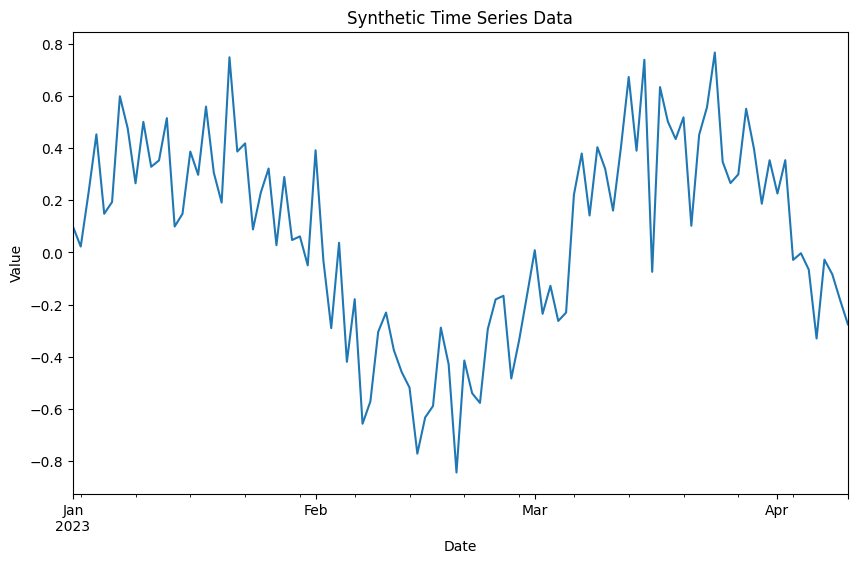

In [57]:
#Generate synthetic time series data
np.random.seed(42)
n = 100  # Number of data points
time = np.arange(n)
y = 0.5 * np.sin(0.1 * time) + 0.2 * np.random.normal(size=n)  # Sine wave + noise

# Convert to pandas Series for easier handling
data = pd.Series(y, index=pd.date_range('2023-01-01', periods=n, freq='D'))
print(data.head())

#Plot the data
plt.figure(figsize=(10, 6))
data.plot(title='Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

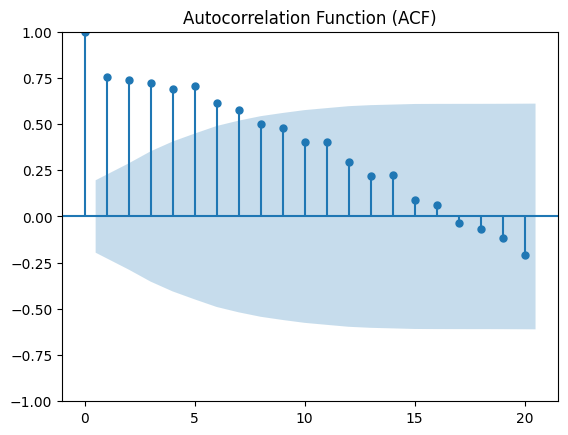

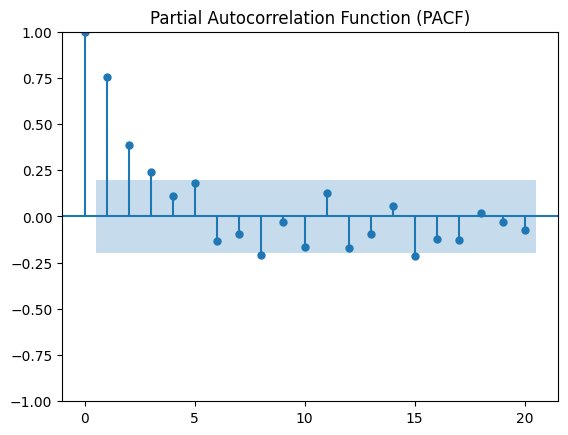

In [23]:
#Plot ACF and PACF to determine the AR order (p)
plot_acf(data, lags=20)  # Autocorrelation Function (ACF)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data, lags=20)  # Partial Autocorrelation Function (PACF)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [24]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [25]:
#Fit an AR model
p = 4   # AR order (based on PACF plot)
model = AutoReg(data, lags=p)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(4)   Log Likelihood                  10.047
Method:               Conditional MLE   S.D. of innovations              0.218
Date:                Tue, 07 Jan 2025   AIC                             -8.094
Time:                        05:41:10   BIC                              7.292
Sample:                    01-05-2023   HQIC                            -1.874
                         - 04-10-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.023     -0.160      0.873      -0.048       0.041
y.L1           0.3322      0.100      3.306      0.001       0.135       0.529
y.L2           0.2556      0.104      2.457      0.0

**Check the summary especially coef and p>|z|.**

Test MAE: 0.15977611425414054
Test RMSE: 0.18613915246348003


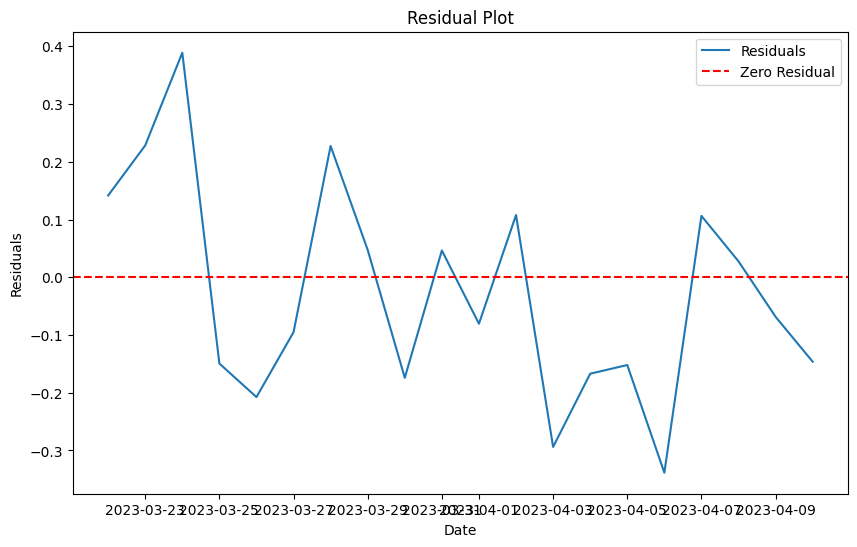

In [26]:
# Forecast on test data
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")


# Residual analysis
residuals = test - forecast

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

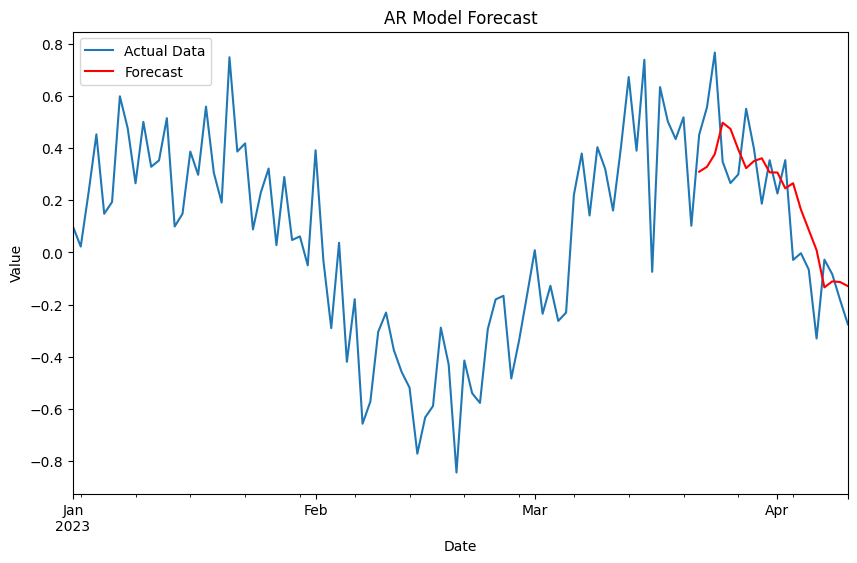

In [27]:
#Forecast future values
forecast_steps = 20  # Number of steps to forecast
forecast = model_fit.predict(start=len(data)-forecast_steps, end=len(data) -1)

#Plot the original data and forecast
plt.figure(figsize=(10, 6))
data.plot(label='Actual Data')
forecast.plot(label='Forecast', color='red')
plt.title('AR Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



Tune it further for better performance.

#2. Moving Average (MA) Model

In [28]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

0      0.496714
1     -0.138264
2      0.302546
3      2.045544
4      0.508123
         ...   
195    1.129413
196   -0.700726
197   -0.657634
198    0.607745
199   -1.179087
Length: 200, dtype: float64


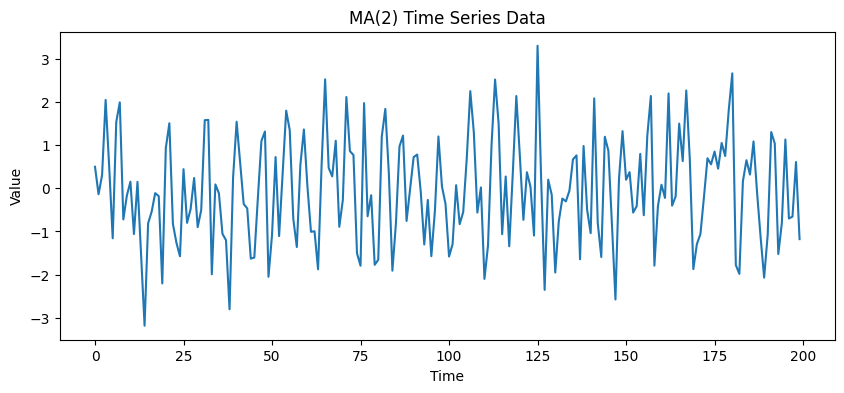

In [58]:
# Generate MA(2) data
np.random.seed(42)  # for reproducibility
errors = np.random.normal(0, 1, 200)  # White noise errors
ma_data = []
for i in range(len(errors)):
    if i < 2:
        ma_data.append(errors[i])
    else:
        ma_data.append(errors[i] + 0.7 * errors[i-1] - 0.5 * errors[i-2]) #ma(2) with coefficients 0.7 and -0.5

ts = pd.Series(ma_data)
print(ts)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(ts)
plt.title("MA(2) Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

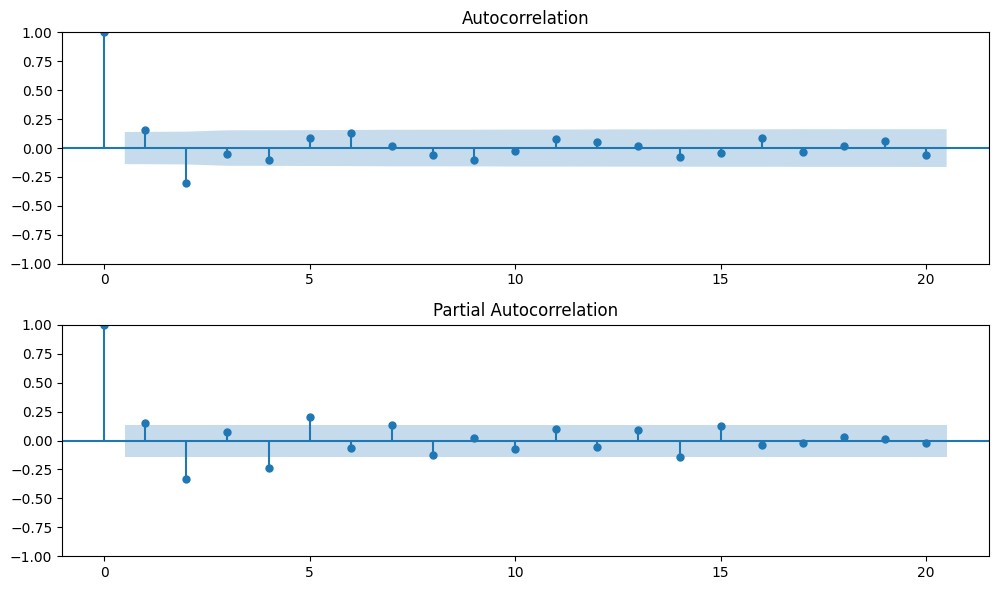

In [32]:
# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(ts, lags=20, ax=axes[0])
plot_pacf(ts, lags=20, ax=axes[1])
plt.tight_layout()
plt.show()

In [33]:
# Split data into train and test sets
train_size_ma = int(len(ma_data) * 0.8)
train_ma, test_ma = ma_data[:train_size_ma], ma_data[train_size_ma:]

In [36]:
# Fit MA models and print summaries
model_ma = ARIMA(ts, order=(0, 0, 2))
results_ma1 = model_ma.fit()
print("MA(1) Summary:")
print(results_ma1.summary())

MA(1) Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -294.066
Date:                Tue, 07 Jan 2025   AIC                            596.132
Time:                        05:44:36   BIC                            609.325
Sample:                             0   HQIC                           601.471
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0512      0.069     -0.745      0.456      -0.186       0.083
ma.L1          0.3986      0.065      6.140      0.000       0.271       0.526
ma.L2         -0.4796      0.069     

**Check the summary especially coef and p>|z|.**

Test MAE: 0.5935322020433688
Test RMSE: 0.18613915246348003


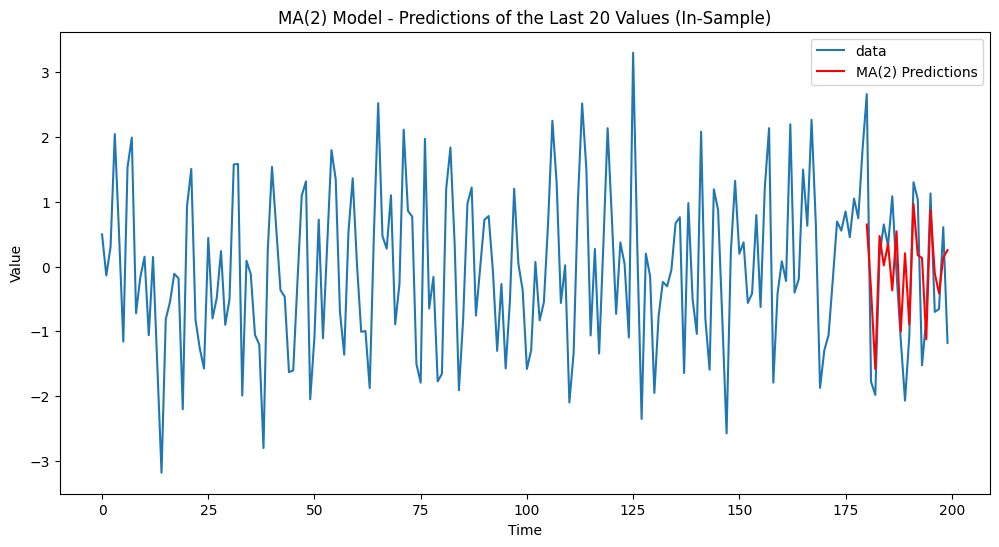

In [37]:
# Forecast on test data
start_index= len(ts)-20
end_index=len(ts)-1

predictions = results_ma1.predict(start=start_index, end=end_index)

# Calculate evaluation metrics
mae_ma = mean_absolute_error(test, predictions)
mse_ma = mean_squared_error(test, predictions)
rmse_ma = np.sqrt(mse)

print(f"Test MAE: {mae_ma}")
print(f"Test RMSE: {rmse_ma}")


# Plot the original last 20 values and the predictions
plt.figure(figsize=(12, 6))
ts.plot(label='data')
plt.plot(predictions, color='red', label="MA(2) Predictions")
plt.title("MA(2) Model - Predictions of the Last 20 Values (In-Sample)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

#3. ARIMA Model

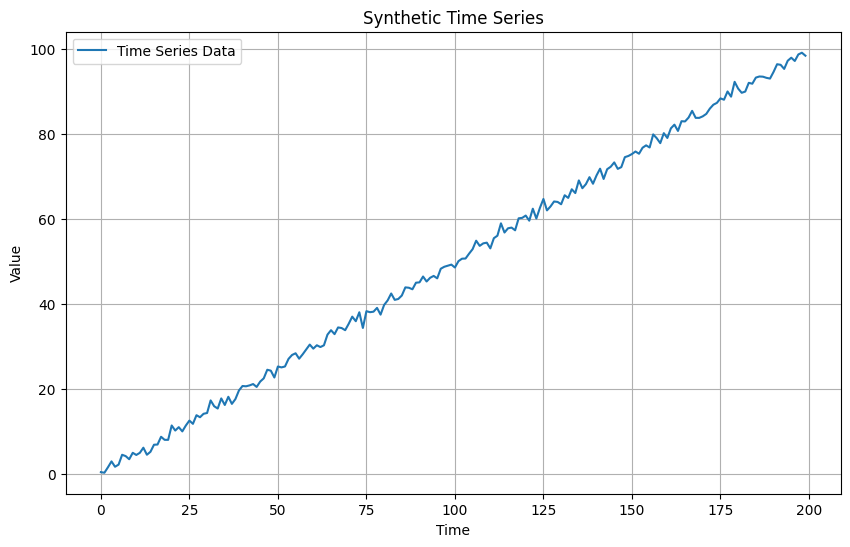

In [62]:
# Generate synthetic data
np.random.seed(42)
n = 200
time = np.arange(n)
X = 0.5 * time + np.random.randn(n)  # Linear trend + noise
train_diff = np.diff(X, n=1)  # First-order differencing

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(X, label="Time Series Data")
plt.title("Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

**Data should be stationary, if not use differencing to make it stationary for ARIMA model to work.**

In [39]:
# Check stationarity using ADF test
result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If p-value > 0.05, the series is non-stationary
if result[1] > 0.05:
    print("Non-stationary")
    train_diff = np.diff(train, n=1)  # First-order differencing
else:
    print("stationary.")

ADF Statistic: -0.891449794463216
p-value: 0.7907750807856028
Non-stationary


<Figure size 1000x600 with 0 Axes>

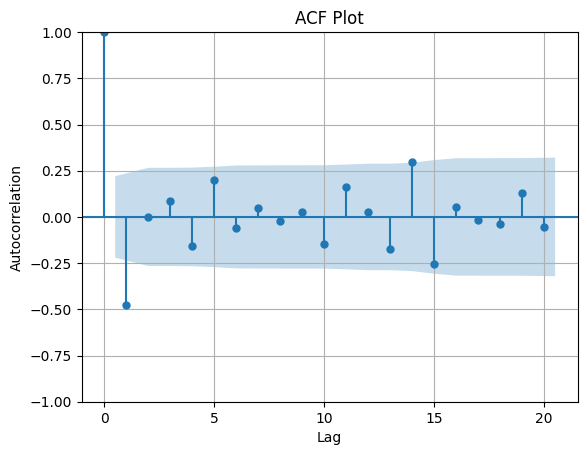

<Figure size 1000x600 with 0 Axes>

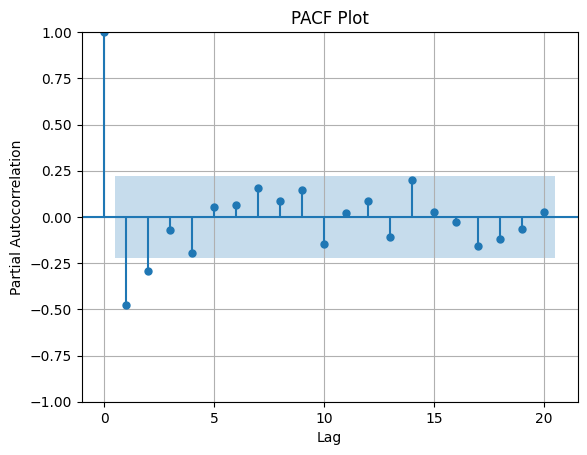

In [40]:
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(train_diff, lags=20, alpha=0.05, title="ACF Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(train_diff, lags=20, alpha=0.05, title="PACF Plot")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.grid(True)
plt.show()

In [41]:
# Split data into training and test sets
train_size = n - 40
train = X[:train_size]  # First 80 observations
test = X[train_size:]   # Last 20 observations

In [52]:
# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 3))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  160
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -223.476
Date:                Tue, 07 Jan 2025   AIC                            458.952
Time:                        05:47:54   BIC                            477.366
Sample:                             0   HQIC                           466.430
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0006      0.008      0.085      0.932      -0.014       0.016
ar.L2          0.9994      0.008    131.460      0.000       0.984       1.014
ma.L1         -0.9952      0.494     -2.014      0.0

**Check the summary especially coef and p>|z|.**

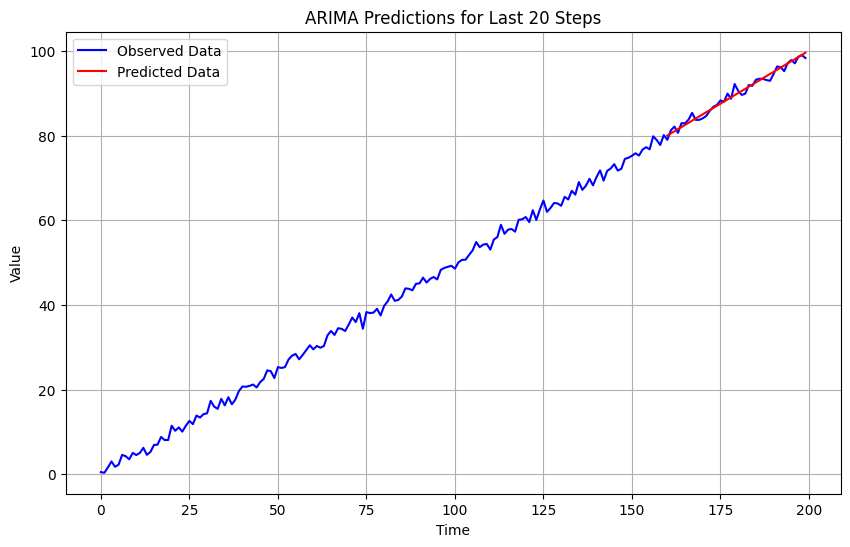

In [53]:
# Predict the last 20 steps
predictions = results.predict(start=train_size, end=n-1, dynamic=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, label="Observed Data", color="blue")
plt.plot(np.arange(train_size, n), predictions, label="Predicted Data", color="red")
plt.title("ARIMA Predictions for Last 20 Steps")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

**Here further tuning is required.**

In [54]:
# Calculate prediction error (e.g., Mean Absolute Error)
mae = np.mean(np.abs(test - predictions))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.7198767206767854


#4. SARIMA Model

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.rename(columns={'Passengers': 'Passengers'}, inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


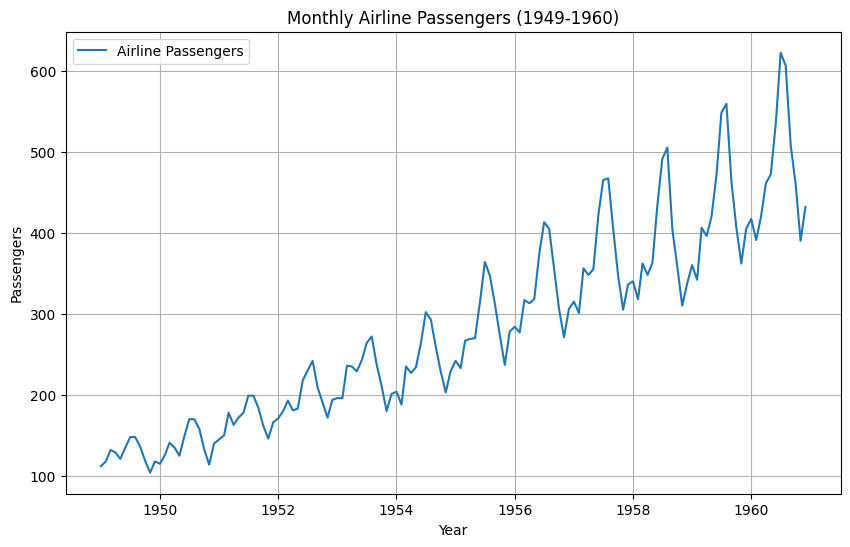

In [66]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data, label="Airline Passengers")
plt.title("Monthly Airline Passengers (1949-1960)")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid(True)
plt.legend()
plt.show()

**Data should be stationary, if not use differencing to make it stationary for SARIMA model to work.**

In [67]:
#Check Stationarity
# Augmented Dickey-Fuller (ADF) test
result= adfuller(data['Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If p-value > 0.05, the data is non-stationary
if result[1] > 0.05:
    print("Data is non-stationary. Applying differencing.")
    data_diff = data.diff().dropna()  # First-order differencing
else:
    print("Data is stationary.")


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Data is non-stationary. Applying differencing.


In [68]:
print(data_diff)

            Passengers
Month                 
1949-02-01         6.0
1949-03-01        14.0
1949-04-01        -3.0
1949-05-01        -8.0
1949-06-01        14.0
...                ...
1960-08-01       -16.0
1960-09-01       -98.0
1960-10-01       -47.0
1960-11-01       -71.0
1960-12-01        42.0

[143 rows x 1 columns]


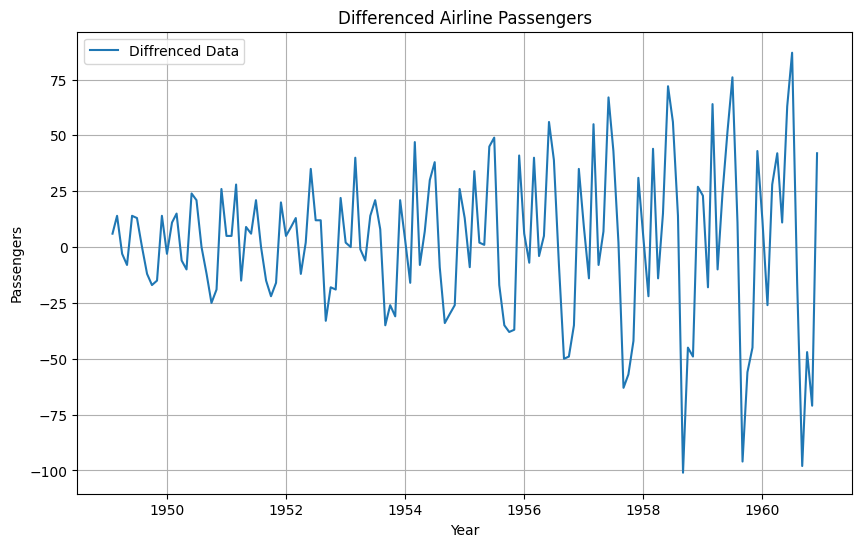

In [69]:
#plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label= 'Diffrenced Data')
plt.title("Differenced Airline Passengers")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.show()

**Data needed to be stationary before feed into the model so understand about stationary conditions and white noise and also which models need stationary data to work well.**

<Figure size 1200x600 with 0 Axes>

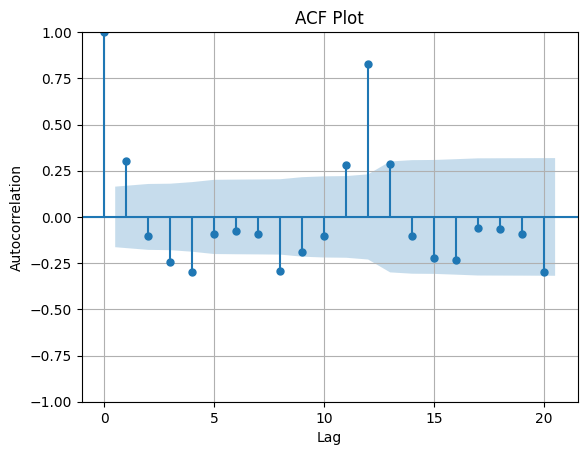

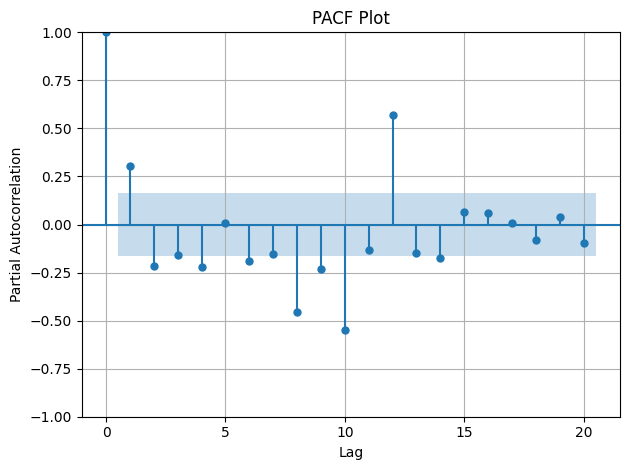

In [70]:
# ACF Plot
plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
plot_acf(data_diff, lags=20, alpha=0.05, title="ACF Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

# PACF Plot
# plt.subplot(1, 2, 2)
plot_pacf(data_diff, lags=20, alpha=0.05, title="PACF Plot")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.grid(True)

plt.tight_layout()
plt.show()

In [71]:
#FIT SARIMA Model
# SARIMA parameters: (p, d, q)(P, D, Q, s)
# p=1, d=1, q=1 (non-seasonal)
# P=1, D=1, Q=1, s=12 (seasonal) tune it based on the you data seasonality patterns
model = SARIMAX(data['Passengers'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -503.124
Date:                            Tue, 07 Jan 2025   AIC                           1018.248
Time:                                    05:53:34   BIC                           1035.499
Sample:                                01-01-1949   HQIC                          1025.258
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5800      0.096      6.035      0.000       0.392       0.768
ar.L2          0.2287      0.103   

**Check the summary especially coef and p>|z|.**

In [72]:
# Forecast the next 24 months
forecast_steps = 24
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


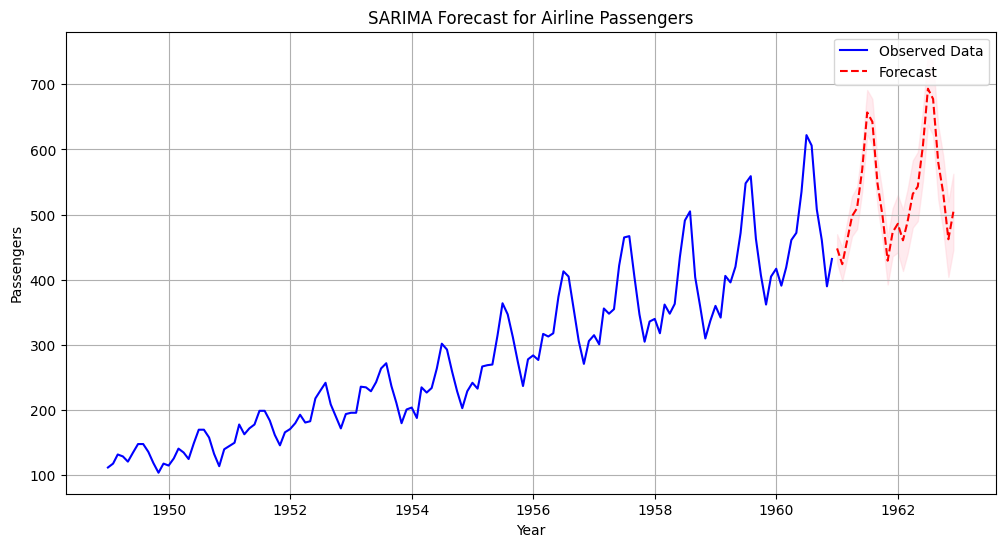

In [73]:
#Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(data, label="Observed Data", color="blue")
plt.plot(forecast_mean, label="Forecast", color="red", linestyle="--")
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color="pink",
    alpha=0.3,
)
plt.title("SARIMA Forecast for Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid(True)
plt.legend()
plt.show()

#Exponential Smoothing

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

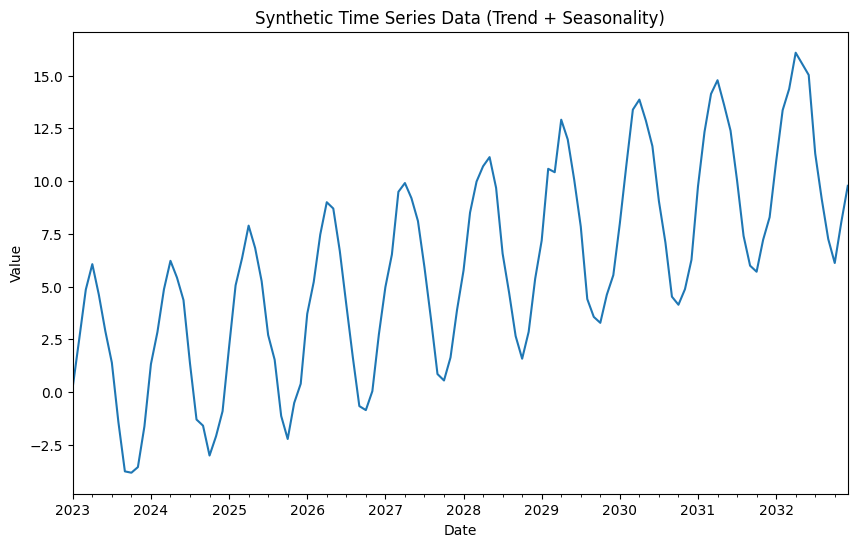

In [75]:
# Generate synthetic time series data
np.random.seed(42)
n = 120  # Number of data points
time = np.arange(n)
trend = 0.1 * time  # Linear trend
seasonality = 5 * np.sin(2 * np.pi * time / 12)  # Seasonal component (12-month cycle)
noise = 0.5 * np.random.normal(size=n)  # Random noise
y = trend + seasonality + noise  # Combined time series

# Convert to pandas Series with a datetime index
data = pd.Series(y, index=pd.date_range('2023-01-01', periods=n, freq='M'))

# Plot the data
plt.figure(figsize=(10, 6))
data.plot(title='Synthetic Time Series Data (Trend + Seasonality)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

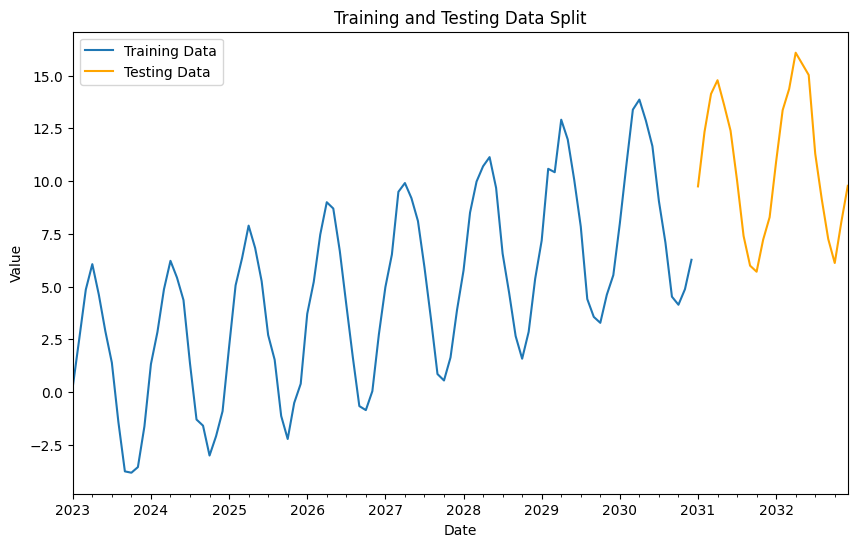

In [76]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Plot training and testing data
plt.figure(figsize=(10, 6))
train.plot(label='Training Data')
test.plot(label='Testing Data', color='orange')
plt.title('Training and Testing Data Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [77]:
# Fit Holt-Winters Seasonal Model
model = ExponentialSmoothing(
    train,
    trend='add',  # Additive trend
    seasonal='add',  # Additive seasonality
    seasonal_periods=12  # 12-month seasonality
)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   96
Model:             ExponentialSmoothing   SSE                             19.218
Optimized:                         True   AIC                           -122.414
Trend:                         Additive   BIC                            -81.384
Seasonal:                      Additive   AICC                          -113.531
Seasonal Periods:                    12   Date:                 Tue, 07 Jan 2025
Box-Cox:                          False   Time:                         05:54:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0897393                alpha                 True
smoothing_trend          

**Check the summary especially coef.**

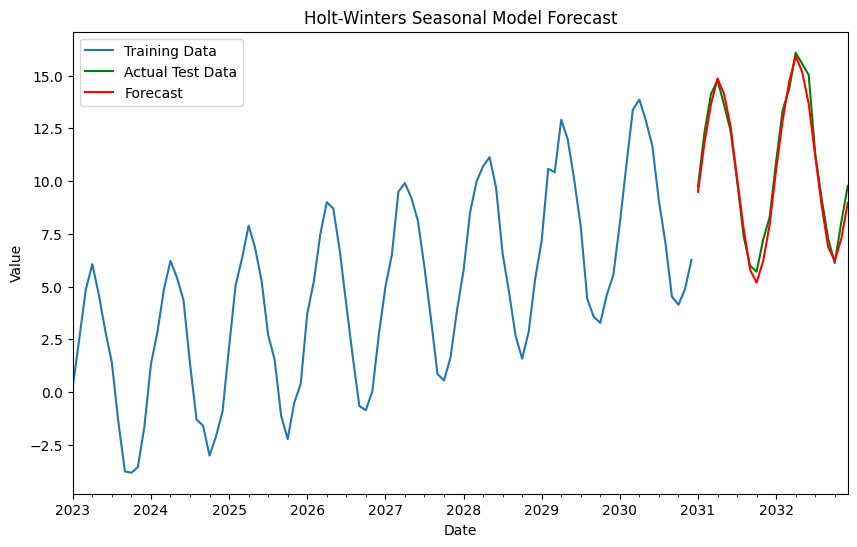

In [78]:
# Forecast values for the testing period
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
train.plot(label='Training Data')
test.plot(label='Actual Test Data', color='green')
forecast.plot(label='Forecast', color='red')
plt.title('Holt-Winters Seasonal Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.4298889223216342
Root Mean Squared Error (RMSE): 0.5240729432661999


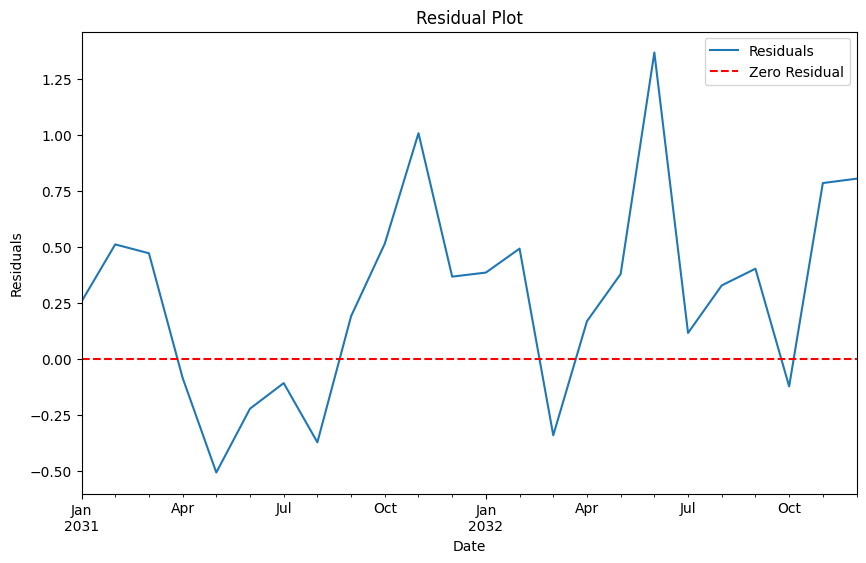

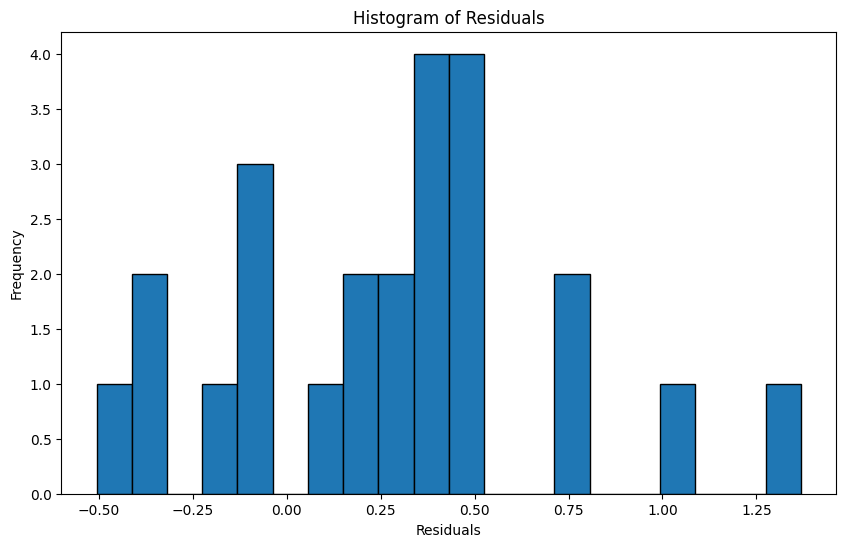

In [80]:
# Calculate residuals
residuals = test - forecast

# Plot residuals
plt.figure(figsize=(10, 6))
residuals.plot(label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot histogram of residuals (optional)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

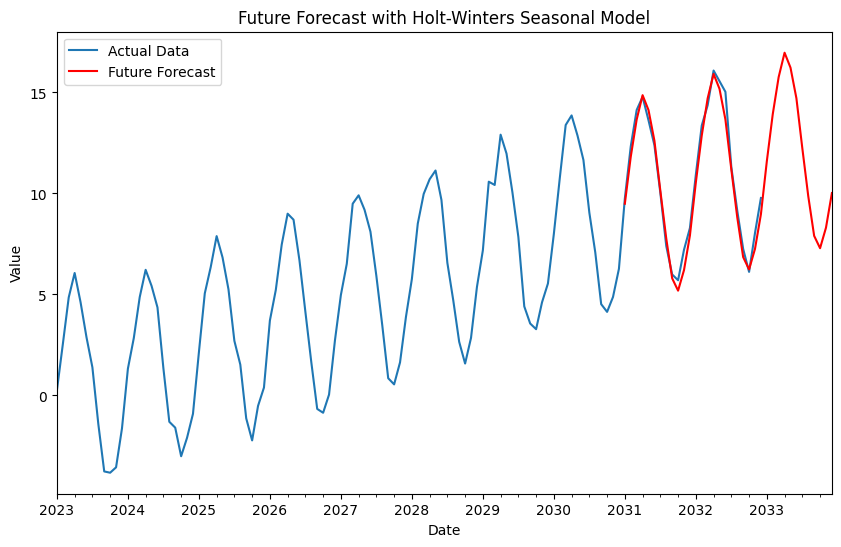

In [81]:
# Forecast future values (e.g., next 12 months)
future_steps = 36 #lets test 3 years
future_forecast = model_fit.forecast(steps=future_steps)

# Plot the full time series with future forecast
plt.figure(figsize=(10, 6))
data.plot(label='Actual Data')
future_forecast.plot(label='Future Forecast', color='red')
plt.title('Future Forecast with Holt-Winters Seasonal Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()